# Supervised Learning Capstone

## House Prices: Advanced Regression Techniques

### Description of Data Fields (via Kaggle)

Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# Introduction

For this capstone project we will be using the Ames, Iowa housing dataset provided by Kaggle here:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

The data consists of 81 total variables, many of which are redundant and/or unnecessary. Our target variable which we are trying to predict is `SalePrice`. 

We will first examine some of the key features and their relationships to `SalePrice`, and then we will try different methods of feature selection in order to reduce the feature set. Then we will do three iterations of model building and see which one works best:

    1) Simple feature selection based on manual inspection

    2) Feature importances from random forest regression
    
    3) Principal Components Analysis

# Preparing the Data
## Loading the Data

In [1257]:
import sys
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import norm
from scipy.stats import skew
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
pd.set_option("display.max_rows", 100)

In [1258]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1259]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1260]:
df_train.shape

(1460, 81)

Before we start, let's drop `Id` since it is unnecessary for our analysis.

In [1261]:
df_train.drop('Id', axis=1, inplace=True)
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Dropping Outliers

The dataset [documentation](http://jse.amstat.org/v19n3/decock.pdf) indicates that there are five outliers that should be removed prior to proceeding with the data (four in the training set). These outliers can be easily seen from the scatter plot of `SalePrice` vs. `GrLivArea`. Let's write a simple function that allows us to easily plot a single scatter plot.

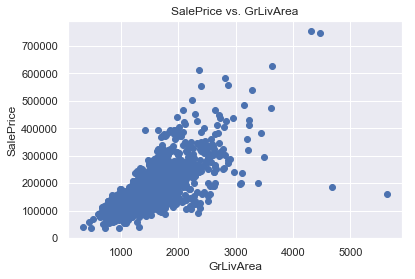

In [1262]:
# Function to easily plot a single scatter plot
def scatter_plot_single(df, target, col):
    plt.scatter(x=df[col], y=df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(target + ' vs. ' + col)

scatter_plot_single(df_train, 'SalePrice', 'GrLivArea')

We can see the five outliers in question. Two of them are very low-priced houses with a high `GrLivArea`. The other three simply appear to be expensive houses that are still following the trend. The documentation recommends us to get rid of all five outliers before processing the data further, so let's do that.

In [1263]:
# Check shape
df_train.shape

(1460, 80)

In [1264]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000)].index)

# Check shape
df_train.shape

(1456, 80)

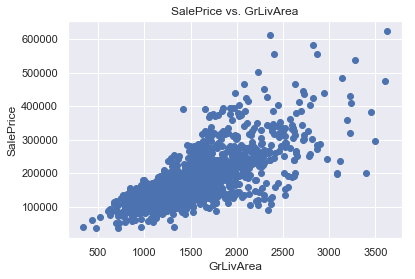

In [1265]:
# Plot again to check if outliers are removed
scatter_plot_single(df_train, 'SalePrice', 'GrLivArea')

In [1266]:
# Check shape
df_train.shape

(1456, 80)

# Feature Visualization

## Univariate Data

In [1267]:
# Function to neatly plot multiple histograms
def histogram_multiple(df, target, cols, figsize_x, figsize_y, nrows, ncols):
    i = 1
    plt.figure(figsize=(figsize_x, figsize_y))
    
    for col in cols:
        if col != target:
            plt.subplot(nrows,ncols,i)
            scatter_plot_single(df, target, col)
            i += 1
    
    plt.tight_layout()
    plt.show()

## Feature-Target Relationships

### Continuous Features

Now let's visualize the relationship between `SalePrice` and all of our continuous features. We can write a function to easily create a scatter plot for any given x and y with our desired parameters. First let's put all the column names for our continuous variables into a list.

In [1268]:
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [1269]:
# Function to easily plot a single scatter plot
def scatter_plot_single(df, target, col):
    plt.scatter(x=df[col], y=df[target])
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(target + ' vs. ' + col)
     
# Function to neatly plot multiple scatter plots
def scatter_plot_multiple(df, target, cols, figsize_x, figsize_y, nrows, ncols):
    i = 1
    plt.figure(figsize=(figsize_x, figsize_y))
    
    for col in cols:
        if col != target:
            plt.subplot(nrows,ncols,i)
            scatter_plot_single(df, target, col)
            i += 1
    
    plt.tight_layout()
    plt.show()

Now we can use this to neatly visualize scatter plots of `SalePrice` with many different input features all in one place. For the amount of features we have, we can use nine rows and four columns.

In [1270]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


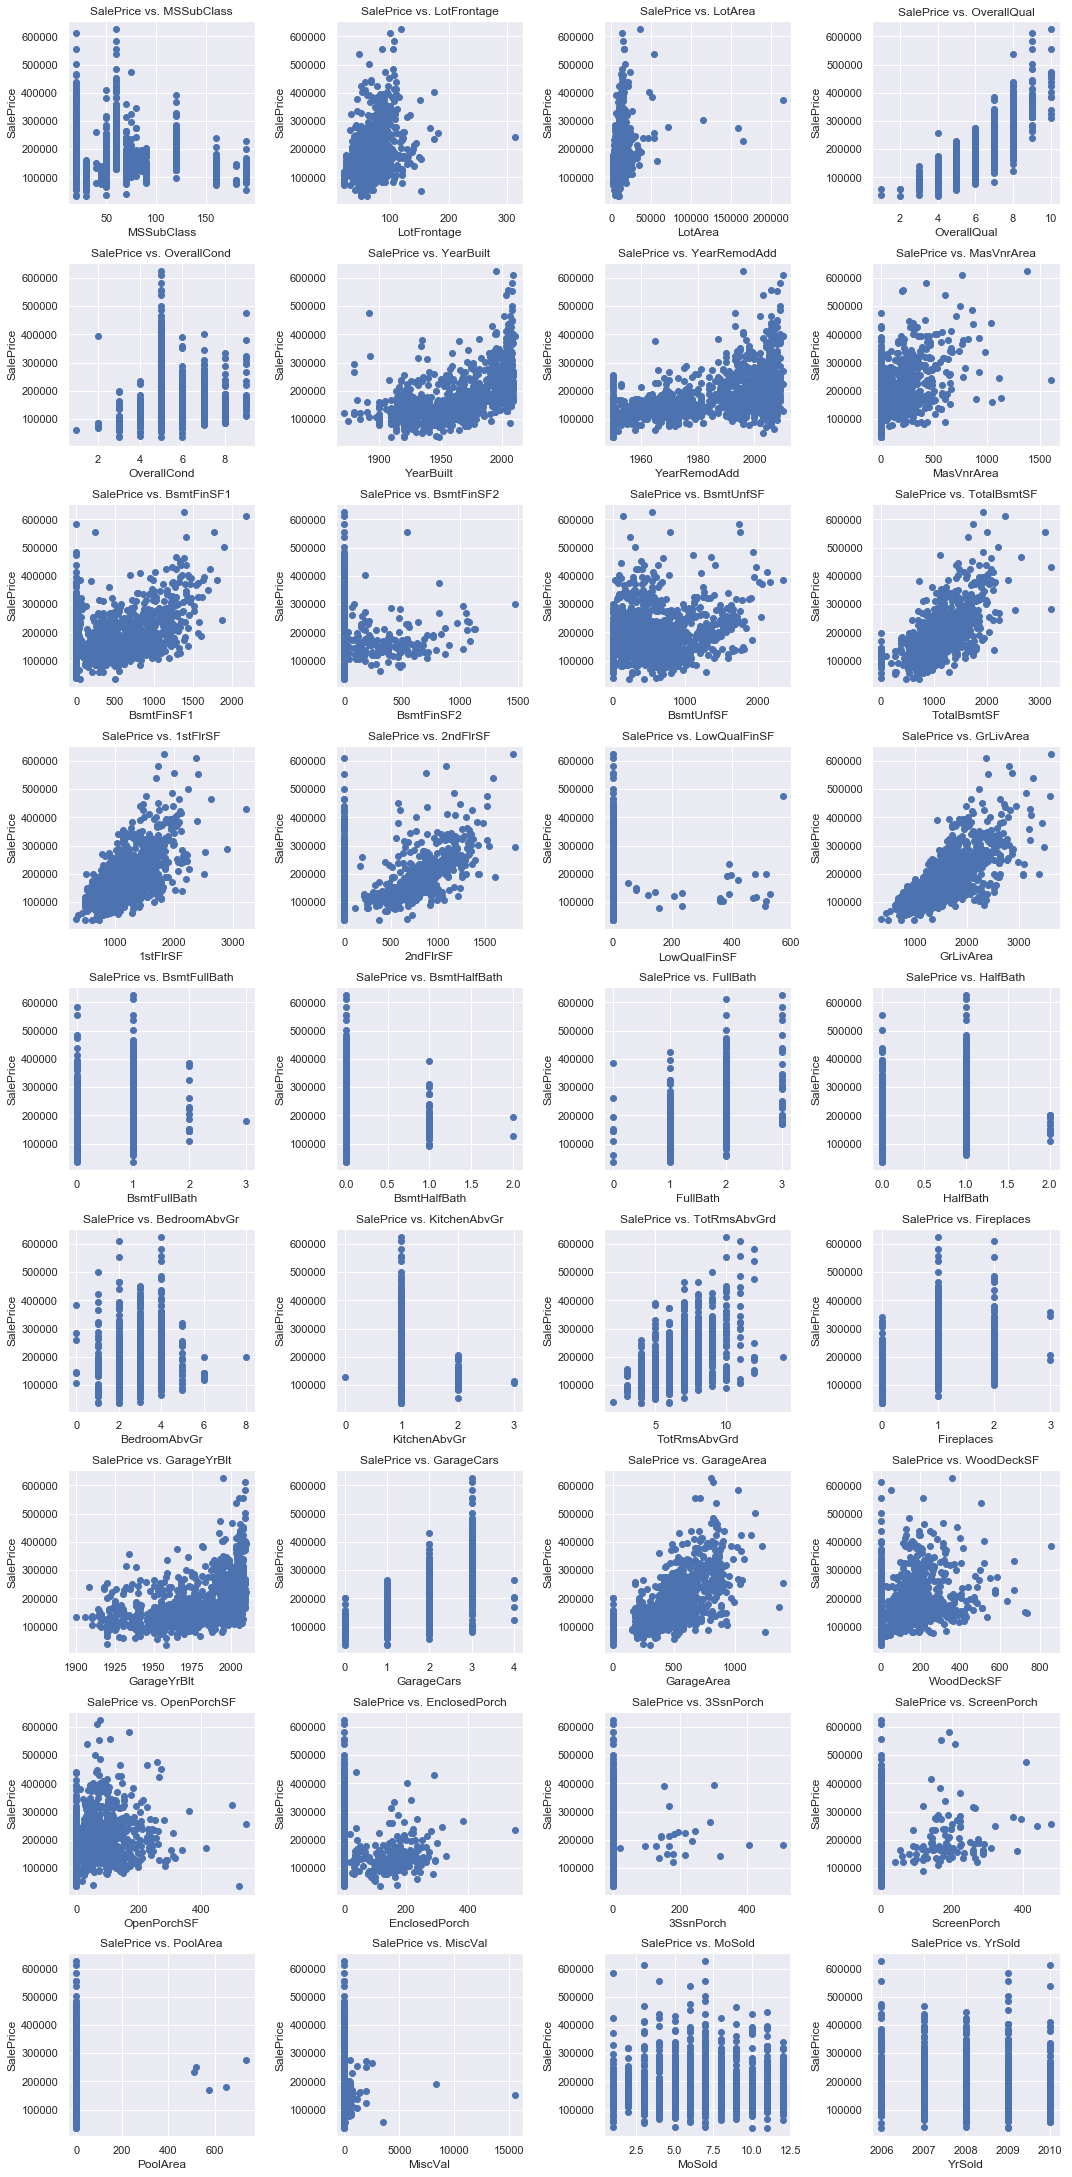

In [1271]:
continuous_feature_names = df_train.select_dtypes(['float64','int64']).columns
scatter_plot_multiple(df_train, 'SalePrice', continuous_feature_names, 15, 50, 15, 4)

The following features appear to exhibit a linear relationship with `SalePrice`:

* `LotFrontage`
* `TotalBsmtSF`
* `1stFlrSF`
* `GrLivArea`
* `GarageArea`

The following features **could possibly** exhibit a linear relationship with `SalePrice` using outlier detection and removal.

* `LotArea`
* `MasVnrArea`
* `BsmtFinSF1`
* `BsmtUnfSF`
* `WoodDeckSF`
* `OpenPorchSF`
* `PoolArea`

Of the second list, `PoolArea` appears to contain the most egregious high-valued outliers. Interestingly enough, most of these outliers occur at a lower `SalePrice`, which seems to be an anomaly. We would naturally expect higher-priced homes to have a larger `PoolArea` (if the home has a pool, of course).

Additionally, many of these numerical features are discrete, e.g. `YearBuilt` and `TotRmsAbvGrd`, so we will have to convert these to categorical features using `get_dummies()` prior to modeling.

### Categorical Features

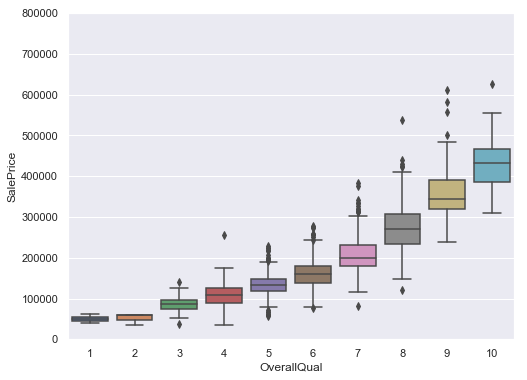

In [1272]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

We can clearly see that as the owner-reported `OverallQual` rating increases, the `SalePrice` increases as well.

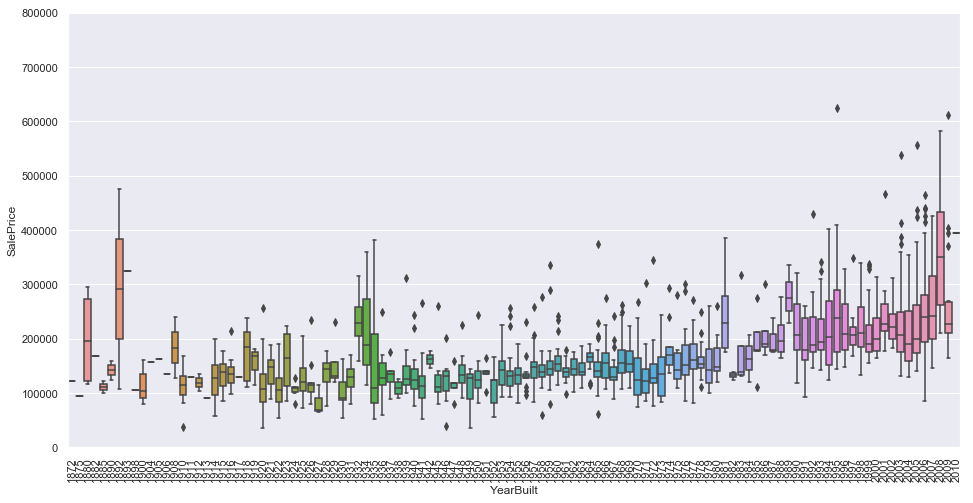

In [1273]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# Exploring the Data

When analyzing the features in our dataset, we must keep in mind whether or not the average homebuyer would factor in a particular variable when purchasing a home. For example, most prospective homebuyers would probably consider `GrLivArea` (ground living area in square feet) to be far more important than `LotShape` (general shape of the property).

Our target variable is `SalePrice`, so our objective will be to predict a home's selling price based on the given input features. Thus, we will place an emphasis on feature selection to maximize model accuracy.

### Analysis of SalePrice

Let's take a closer look at our target variable.

In [1274]:
df_train['SalePrice'].describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

In [1275]:
df_train[df_train.SalePrice == df_train.SalePrice.max()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1169,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


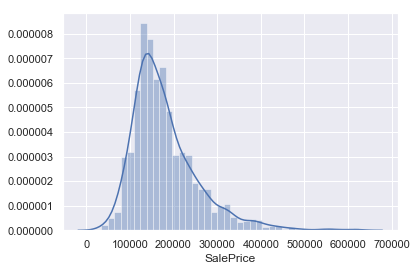

In [1276]:
sns.distplot(df_train['SalePrice']);

`SalePrice` deviates from a normal distribution and appears to be right-skewed. Linear models perform better with normally distributed data, so we need to transform this variable. We can use the `numpy.log1p()` function to transform the data so that it is accurate for a wide range of floating point values.

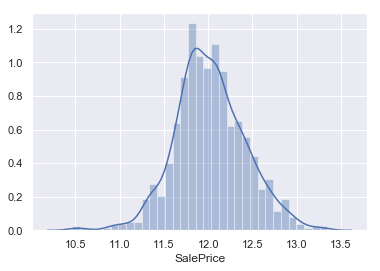

In [1277]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

# Check the distribution again
sns.distplot(df_train['SalePrice']);

### Correlation Heatmap

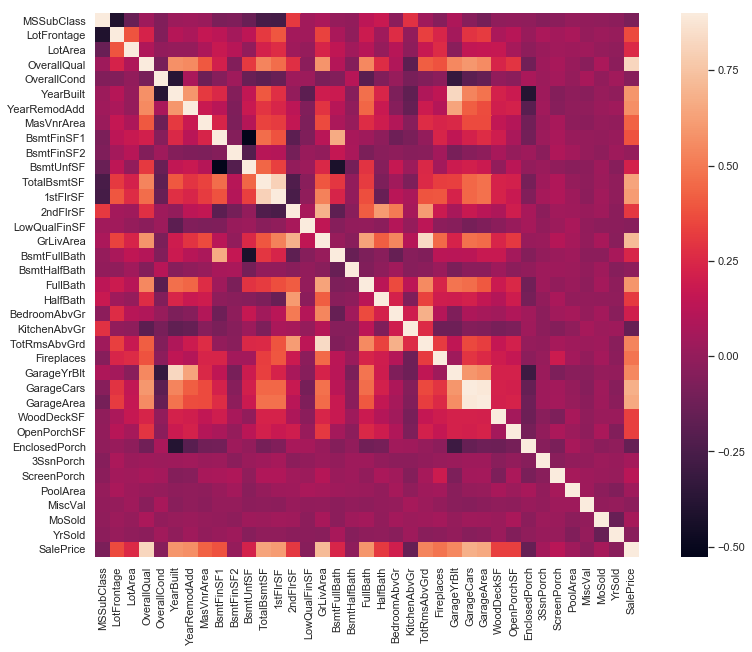

In [1278]:
# Correlation map
corr = df_train.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmax=0.9, square=True)

## Feature Engineering

### Handle Missing Values
We will impute the missing values for each feature.

In [1279]:
df_train.shape

(1456, 80)

In [1280]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

We can see that `PoolQC`, `MiscFeature`, `Alley`, `Fence`, and `FirePlaceQu` all have at least 40% of values that are null. In the case of the first three, over 90% of the data is NaN.

In [1281]:
#df_train = df_train.drop(['MSSubClass', 'MSZoning', 'LotFrontage', 'LandContour', 'Condition1', 'Condition2',
#                           'Exterior1st', 'Exterior2nd', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 
#                           'GarageCars', 'GarageYrBlt', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

In [1282]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
PoolQC,1451,0.996566
MiscFeature,1402,0.962912
Alley,1365,0.937500
Fence,1176,0.807692
FireplaceQu,690,0.473901
LotFrontage,259,0.177885
GarageType,81,0.055632
GarageCond,81,0.055632
GarageFinish,81,0.055632
GarageQual,81,0.055632


### PoolQC
A value of NaN means the house does not have a pool. This is why there are so many missing values, as most houses expectedly do not have pools. We can fill in the missing values with 'None' to indicate no pool, as this is a categorical feature.

In [1283]:
df_train['PoolQC'] = df_train['PoolQC'].fillna('None')

### MiscFeature
A value of NaN means there is no miscellaneous feature. Since this is a categorical variable, we can simply fill in the missing values with 'None' to indicate no miscellaneous feature.

In [1284]:
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('None')

### Alley
A value of NaN means there is no alley access. Again, we can fill in the missing values with 'None'.

In [1285]:
df_train['Alley'] = df_train['Alley'].fillna('None')

### Fence
A value of NaN means there is no fence. We can fill in the missing values with 'None'.

In [1286]:
df_train['Fence'] = df_train['Fence'].fillna('None')

### FireplaceQu
A value of NaN means there is no fireplace. We can fill in the missing values with 'None'.

In [1287]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')

### LotFrontage
We can assume that homes in the same neighborhood will have similar values for the linear feet of street connected to their property. Thus, we can use `groupby` to group by neighborhood and fill in the missing values with the median LotFrontage.

In [1288]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna('None')

### GarageType, GarageCond, GarageFinish, GarageQual, GarageYrBlt
For each of the categorical garage features, we can fill in the missing values with 'None', since it indicates no garage.

In [1289]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt']:
    df_train[col] = df_train[col].fillna('None')

### BsmtQual, BsmtCond, BsmtFinType1
For these three basement features, we can fill in the missing values with 'None'.

In [1290]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    df_train[col] = df_train[col].fillna('None')

###  BsmtFinType2, BsmtExposure
For these two basement features, we can fill in the missing values with 'None'.

In [1291]:
for col in ['BsmtFinType2', 'BsmtExposure']:
    df_train[col] = df_train[col].fillna('None')

### MasVnrArea
A value of NaN means no masonry veneer for the home, so we can fill in missing values with 0.

In [1292]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna('None')

### MsVnrType
A value of NaN means no masonry veneer for the home, so we can fill in missing values with 'None'.

In [1293]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')

### Utilities
All of the values are 'AllPub' except for three of them. Therefore, this feature will not be useful for modeling, and we can safely drop it.

In [1294]:
df_train = df_train.drop(['Utilities'], axis=1)

### Functional
According to the data description, a value of NaN means typical. Thus, we can replace missing values with 'Typ'.

In [1295]:
df_train['Functional'] = df_train['Functional'].fillna('Typ')

### Electrical
There is only one NaN value, so we can replace it with the most frequently occurring value, 'SBrkr'.

In [1296]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [1297]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

,Total,Percent
SalePrice,0,0.0
BsmtQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtCond,0,0.0


In [1298]:
df_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,56.888736,10448.784341,6.088599,5.576236,1971.18544,1984.819368,436.991071,46.677198,566.990385,1050.658654,...,93.833791,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516,6.326236,2007.817308,12.021950
std,42.358363,9860.763449,1.369669,1.113966,30.20159,20.652143,430.255052,161.522376,442.197182,412.155715,...,125.192349,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265,2.698356,1.329394,0.396077
min,20.000000,1300.000000,1.000000,1.000000,1872.00000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,20.000000,7538.750000,5.000000,5.000000,1954.00000,1966.750000,0.000000,0.000000,222.500000,795.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.774528
50%,50.000000,9468.500000,6.000000,5.000000,1972.00000,1993.500000,381.000000,0.000000,477.500000,990.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,70.000000,11588.000000,7.000000,6.000000,2000.00000,2004.000000,706.500000,0.000000,808.000000,1293.750000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,190.000000,215245.000000,10.000000,9.000000,2010.00000,2010.000000,2188.000000,1474.000000,2336.000000,3206.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.345509


In [1299]:
for col in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    df_train[col] = df_train[col].apply(str)

In [1300]:
print(df_train.dtypes)

MSSubClass        object
MSZoning          object
LotFrontage       object
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [1301]:
'''cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')'''

cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
        'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

# Apply LabelEncoder to categorical features
for col in cols:
    le = LabelEncoder() 
    le.fit(list(df_train[col].values)) 
    df_train[col] = le.transform(list(df_train[col].values))

### Add TotalSF Feature

In [1302]:
# Add feature for total square footage
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']

### Add HasBsmt Feature

In [1303]:
#df_train['HasBsmt'] = (df_train['TotalBsmtSF'] == 0).astype(int)
#df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
#df_train['HasBsmt'].describe()

In [1304]:
# Transform data
#df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

### Transform Skewed Features

In [1305]:
numeric_features = df_train.dtypes[df_train.dtypes != 'object'].index

# Check the skew of all numerical features
skewed_features = df_train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_features})
skewness.head(10)

,Skew
MiscVal,24.418175
PoolArea,17.504556
Condition2,13.666839
LotArea,12.574590
3SsnPorch,10.279262
Heating,9.831083
LowQualFinSF,8.989291
RoofMatl,8.293646
MiscFeature,5.003955
LandSlope,4.801326


In [1306]:
skewness = skewness[abs(skewness) > 0.75]
print('Total skewed features: {}'.format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
alpha = 0.15
for feat in skewed_features:
    df_train[feat] = boxcox1p(df_train[feat], alpha)

Total skewed features: 80


In [1307]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
TotalSF          0.818688
OverallQual      0.807515
GrLivArea        0.731916
GarageCars       0.651601
1stFlrSF         0.611539
YearBuilt        0.588067
FullBath         0.580468
YearRemodAdd     0.569673
TotRmsAbvGrd     0.537881
GarageArea       0.514140
Fireplaces       0.504512
OpenPorchSF      0.455154
TotalBsmtSF      0.452905
Foundation       0.422644
MasVnrArea       0.399646
LotArea          0.398700
CentralAir       0.360052
GarageYrBlt      0.346215
WoodDeckSF       0.345822
HalfBath         0.317856
PavedDrive       0.308681
GarageCond       0.305296
Electrical       0.290795
GarageQual       0.254047
BsmtFullBath     0.240337
HouseStyle       0.235704
BsmtFinSF1       0.230895
SaleCondition    0.227298
BsmtUnfSF        0.211560
BedroomAbvGr     0.199687
2ndFlrSF         0.191466
RoofStyle        0.176940
Neighborhood     0.159349
Condition1       0.155446
ExterCond        0.154468
Exterior2nd     

In [1308]:
#convert categorical variable into dummy
#df_train = pd.get_dummies(df_train)
#df_train.head()

In [1309]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

## Modeling

In [1310]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train.loc[:, ['SalePrice']]

In [1311]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,2.750250,1.540963,6.073289,19.212182,0.730463,0.730463,1.540963,1.540963,1.820334,0.0,...,0.0,1.540963,1.820334,0.730463,0.0,1.820334,1.194318,2.602594,1.820334,14.976591
1,1.820334,1.540963,6.426513,19.712205,0.730463,0.730463,1.540963,1.540963,1.194318,0.0,...,0.0,1.540963,1.820334,0.730463,0.0,2.440268,0.730463,2.602594,1.820334,14.923100
2,2.750250,1.540963,6.148461,20.347241,0.730463,0.730463,0.000000,1.540963,1.820334,0.0,...,0.0,1.540963,1.820334,0.730463,0.0,3.011340,1.194318,2.602594,1.820334,15.149678
3,2.885846,1.540963,5.942124,19.691553,0.730463,0.730463,0.000000,1.540963,0.000000,0.0,...,0.0,1.540963,1.820334,0.730463,0.0,1.820334,0.000000,2.602594,0.000000,14.857121
4,2.750250,1.540963,6.512196,21.325160,0.730463,0.730463,0.000000,1.540963,1.194318,0.0,...,0.0,1.540963,1.820334,0.730463,0.0,1.540963,1.194318,2.602594,1.820334,15.852312


In [1312]:
X.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2.120462,1.532216,5.959230,19.545432,0.727453,0.718440,1.006929,1.439999,1.403936,0.043274,...,0.036790,1.538315,1.636966,0.758122,0.403946,2.211254,0.988608,2.478930,1.703198,14.834646
std,0.804227,0.242085,1.089439,2.025558,0.046811,0.155738,0.720319,0.338967,0.712903,0.186299,...,0.627302,0.051895,0.432910,0.152325,2.153524,0.740955,0.623489,0.465932,0.475669,0.980603
min,0.000000,0.000000,0.000000,12.878993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.279836
25%,1.820334,1.540963,5.831328,18.773051,0.730463,0.730463,0.000000,1.540963,1.194318,0.000000,...,0.000000,1.540963,1.820334,0.730463,0.000000,2.055642,0.730463,2.602594,1.820334,14.195323
50%,2.055642,1.540963,6.197221,19.657692,0.730463,0.730463,1.540963,1.540963,1.820334,0.000000,...,0.000000,1.540963,1.820334,0.730463,0.000000,2.440268,1.194318,2.602594,1.820334,14.855815
75%,2.750250,1.540963,6.553880,20.467446,0.730463,0.730463,1.540963,1.540963,1.820334,0.000000,...,0.000000,1.540963,1.820334,0.730463,0.000000,2.750250,1.540963,2.602594,1.820334,15.488874
max,3.340760,1.820334,6.826617,35.391371,0.730463,1.194318,1.540963,1.540963,1.820334,1.194318,...,11.289160,1.540963,1.820334,1.820334,21.677435,3.011340,1.820334,2.602594,2.055642,18.172113


In [1313]:
y.head()

,SalePrice
0,3.156009
1,3.140516
2,3.163719
3,3.111134
4,3.176081


In [1314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1315]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

scores = cross_val_score(lr, X, y, cv=10)
rmse = mean_squared_error(y_test, y_pred)**0.5

print('Score With 20% Holdout:\n{0:.2%}'.format(lr.score(X_test, y_test)))
print('Cross Validation Scores:\n', scores)
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
89.94%
Cross Validation Scores:
 [0.88719114 0.92113697 0.92998164 0.89757169 0.88832517 0.8957752
 0.89790101 0.91218531 0.90615163 0.91275815]
Average Cross Validation Score:
90.49%
Root Mean Squared Error:
0.014129034286380123


In [1316]:
y.shape

(1456, 1)

In [1317]:
rfr = RandomForestRegressor(criterion='mse', max_depth=10)
rfr.fit(X_train, y_train.values.ravel())
y_pred = rfr.predict(X_test)

scores = cross_val_score(rfr, X, y.values.ravel(), cv=10)
rmse = mean_squared_error(y_test, y_pred)**0.5

print('Score With 20% Holdout:\n{0:.2%}'.format(rfr.score(X_test, y_test)))
print('Cross Validation Scores:\n{}'.format(scores))
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))
print('Root Mean Squared Error:\n{}'.format(rmse))

/Users/rakeshbhatia/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score With 20% Holdout:
86.51%
Cross Validation Scores:
[0.8413359  0.88676112 0.88287764 0.87129367 0.85242063 0.88520549
 0.85624948 0.87204865 0.85519995 0.84245298]
Average Cross Validation Score:
86.46%
Root Mean Squared Error:
0.016356823753834737


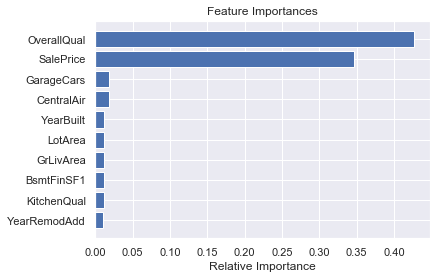

In [1334]:
features = df_train.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1318]:
feature_importances = pd.DataFrame(rfr.feature_importances_, index = X_train.columns, 
                                   columns=['importance']).sort_values('importance',ascending=False)

feature_importances.head(10)

,importance
OverallQual,0.426997
TotalSF,0.345990
GarageCars,0.018517
CentralAir,0.018259
YearBuilt,0.011643
LotArea,0.011594
GrLivArea,0.011518
BsmtFinSF1,0.011431
KitchenQual,0.011345
YearRemodAdd,0.010725


In [1325]:
grid_params = [
  {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100], 
   'fit_intercept': [False], 
   'solver': ['auto']},
 ]

In [1326]:
model = Ridge()

# Create a GridSearchCV object with model and parameter inputs
grid = GridSearchCV(estimator=model, param_grid=grid_params, n_jobs=-1, cv=10)

grid.fit(X, y)

print(grid)
print('Best score: ', grid.best_score_)
print('Best alpha: ', grid.best_estimator_.alpha)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50,
                                    100],
                          'fit_intercept': [False], 'solver': ['auto']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best score:  0.9063777198037037
Best alpha:  1


In [1328]:
# Verify grid search result
rr = Ridge(alpha=1, fit_intercept=False)
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)

scores = cross_val_score(rr, X, y, cv=10)
rmse = mean_squared_error(y_test, y_pred)**0.5

print('Score With 20% Holdout:\n{0:.2%}'.format(rr.score(X_test, y_test)))
print('Cross Validation Scores:\n{}'.format(scores))
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))    
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
90.31%
Cross Validation Scores:
[0.88958247 0.93348907 0.93043343 0.89951272 0.88984128 0.89471168
 0.89682012 0.91122683 0.90613859 0.91202581]
Average Cross Validation Score:
90.64%
Root Mean Squared Error:
0.013864208963493663


In [1329]:
grid_params = [
  {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50, 100]}, 
 ]

In [1330]:
model = Lasso()

# Create a GridSearchCV object with model and parameter inputs
grid = GridSearchCV(estimator=model, param_grid=grid_params, n_jobs=-1, cv=10)

grid.fit(X, y)

print(grid)
print('Best score: ', grid.best_score_)
print('Best alpha: ', grid.best_estimator_.alpha)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 25, 50,
                                    100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best score:  0.9027262390790587
Best alpha:  0.0001


In [1332]:
# Verify grid search result
lass = Lasso(alpha=0.0001)
lass.fit(X_train, y_train)
y_pred = lass.predict(X_test)

scores = cross_val_score(lass, X, y, cv=10)
rmse = mean_squared_error(y_test, y_pred)**0.5

print('Score With 20% Holdout:\n{0:.2%}'.format(lass.score(X_test, y_test)))
print('Cross Validation Scores:\n{}'.format(scores))
print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))    
print('Root Mean Squared Error:\n{}'.format(rmse))

Score With 20% Holdout:
89.85%
Cross Validation Scores:
[0.89038869 0.93561878 0.92690766 0.89781049 0.8842588  0.88590809
 0.89259785 0.90534942 0.90279203 0.90559931]
Average Cross Validation Score:
90.27%
Root Mean Squared Error:
0.014189435794223526


### Without Grid Search

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 25, 50, 100]

for x in alphas:
    print('Alpha: ', x)
    rr = linear_model.Ridge(alpha=x, fit_intercept=False) 
    rr.fit(X_train, y_train)
    y_pred = rr.predict(X_test)
    
    scores = cross_val_score(rr, X, y, cv=10)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    
    print('Score With 20% Holdout:\n{0:.2%}'.format(rr.score(X_test, y_test)))
    print('Cross Validation Scores:\n{}'.format(scores))
    print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))    
    print('Root Mean Squared Error:\n{}'.format(rmse))

In [ ]:
alphas = [0.0001, 0.001, 0.01]

for x in alphas:
    print('Alpha: ', x)
    lass = linear_model.Lasso(alpha=x)
    lassfit = lass.fit(X_train, y_train)
    y_pred = lass.predict(X_test)
    
    scores = cross_val_score(rr, X, y, cv=10)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    
    print('Score With 20% Holdout:\n{0:.2%}'.format(lass.score(X_test, y_test)))
    print('Cross Validation Scores:\n{}'.format(scores))
    print('Average Cross Validation Score:\n{0:.2%}'.format(scores.mean()))    
    print('Root Mean Squared Error:\n{}'.format(rmse))